<a href="https://colab.research.google.com/github/mikeusru/neural-network-training/blob/main/sequential_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So far we've been talking about feedforward networks, but often, our network predictions should rely on timed information which happened in the past. This is referred to as:

#Sequence Learning

So let's make a fun RNN to predict the stock market. You can download free stock market data at yahoo, and we're gonna use Gamestop because we're stupid today. Download the historical data and add the cvs to your project.

https://finance.yahoo.com/quote/GME/


In [134]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd

stock_data = pd.read_csv('GME.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-30,31.570000,31.969999,31.000000,31.760000,24.791840,2522100
1,2016-03-31,31.870001,32.430000,31.670000,31.730000,24.768423,2094000
2,2016-04-01,31.730000,31.760000,30.709999,31.340000,24.463989,2135100
3,2016-04-04,31.389999,31.420000,30.709999,30.930000,24.143944,1491800
4,2016-04-05,30.799999,31.080000,30.219999,30.290001,23.644358,1751000


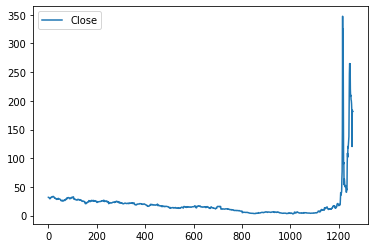

In [145]:
# Make the data univariate, for simplicity
stock_price = stock_data[['Close']]
stock_price.plot()

Ugh. moving along... This dataset is too large, and we need to split it up into batches.

In [136]:
import numpy as np

n_steps = 50

prices = np.array(stock_price.values)
batch_list = []
for i in range(len(prices) // n_steps):
  batch = prices[i*n_steps : (i+1) * n_steps +1]
  batch = batch / np.mean(batch) -1
  batch_list.append(batch)
len(batch_list)
series = np.stack(batch_list)
series.shape


(25, 51, 1)

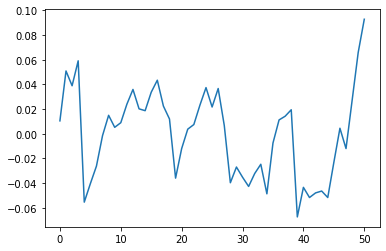

In [137]:
plt.plot(series[10,:])

In [138]:
X_train, y_train = series[:18, :n_steps], series[:18, -1]
X_valid, y_valid = series[20:22, :n_steps], series[20:22, -1]
X_test, y_test = series[22:, :n_steps], series[22:, -1]

In [139]:
X_train.shape, y_train.shape

((18, 50, 1), (18, 1))

The training data is split by batch number, number of time steps per batch, and dimensionality.

We also want to add some **baseline metrics** so we know our algorithm is working better than the most obvious predictions. For example, a baseline prediction for today's stock price is yesterday's stock price. 

In [140]:
y_pred = X_valid[:,-1]
naive_mse = np.mean(keras.losses.mean_squared_error(y_valid, y_pred))
print(f"naive forecast MSE: {naive_mse}")

naive forecast MSE: 0.0001314731181667618


Now let's make the simplest RNN we can build: just a single layer with a single neuron.

In [141]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1/1 [==============================] - 1s 986ms/step - loss: 0.1496 - val_loss: 0.0657
Epoch 2/20
1/1 [==============================] - 0s 57ms/step - loss: 0.1500 - val_loss: 0.0643
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 0.1435 - val_loss: 0.0652
Epoch 4/20
1/1 [==============================] - 0s 51ms/step - loss: 0.1401 - val_loss: 0.0654
Epoch 5/20
1/1 [==============================] - 0s 54ms/step - loss: 0.1378 - val_loss: 0.0633
Epoch 6/20
1/1 [==============================] - 0s 55ms/step - loss: 0.1346 - val_loss: 0.0594
Epoch 7/20
1/1 [==============================] - 0s 49ms/step - loss: 0.1308 - val_loss: 0.0545
Epoch 8/20
1/1 [==============================] - 0s 53ms/step - loss: 0.1270 - val_loss: 0.0493
Epoch 9/20
1/1 [==============================] - 0s 59ms/step - loss: 0.1234 - val_loss: 0.0443
Epoch 10/20
1/1 [==============================] - 0s 62ms/step - loss: 0.1200 - val_loss: 0.0398
Epoch 11/20
1/1 [===========

In [127]:
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 18ms/step - loss: 0.0059


0.005929465871304274

In [128]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.1002 - val_loss: 0.0969
Epoch 2/20
1/1 [==============================] - 0s 67ms/step - loss: 0.1765 - val_loss: 0.0189
Epoch 3/20
1/1 [==============================] - 0s 73ms/step - loss: 0.0624 - val_loss: 0.0850
Epoch 4/20
1/1 [==============================] - 0s 71ms/step - loss: 0.0935 - val_loss: 0.0758
Epoch 5/20
1/1 [==============================] - 0s 70ms/step - loss: 0.0958 - val_loss: 0.0408
Epoch 6/20
1/1 [==============================] - 0s 72ms/step - loss: 0.0685 - val_loss: 0.0080
Epoch 7/20
1/1 [==============================] - 0s 70ms/step - loss: 0.0440 - val_loss: 0.0070
Epoch 8/20
1/1 [==============================] - 0s 66ms/step - loss: 0.0388 - val_loss: 0.0257
Epoch 9/20
1/1 [==============================] - 0s 66ms/step - loss: 0.0496 - val_loss: 0.0282
Epoch 10/20
1/1 [==============================] - 0s 75ms/step - loss: 0.0530 - val_loss: 0.0134
Epoch 11/20
1/1 [==============

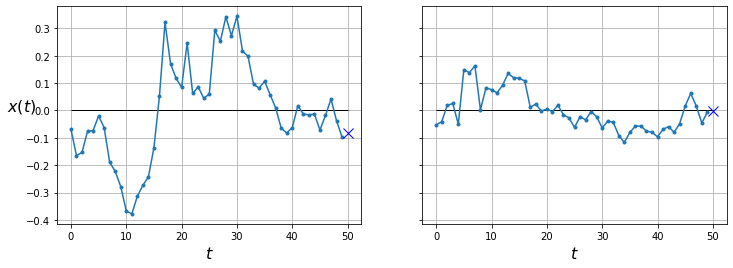

In [142]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 50, linewidth=1)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))

for col in range(2):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

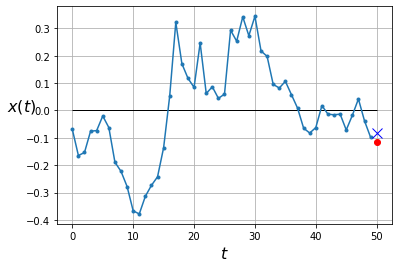

In [143]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()